#  Data PreProcessing-

In [1]:
#importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime ,timedelta

In [2]:
#load the data
from google.colab import files                 #upload the data on the colab notebook
uploded = files.upload()

Saving train_MpHjUjU.csv to train_MpHjUjU.csv


In [3]:
#store the data into dataframe
df= pd.read_csv('train_MpHjUjU.csv' )   # reading the data


#printing the first 10 rows
df.head(5)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [4]:
df.shape   #checking no. of column & rows

(19104, 13)

In [5]:
df.dtypes  #checking datatypes of the column

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
dtype: object

In [6]:
#get count of the empty value of each column
df.isna().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [7]:
#check for any missing value
df.isnull().values.any()

True

In [8]:
#Checking  some statistics
df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [9]:
#Deletig for  dublicate values
df = df.drop_duplicates(subset=['Emp_ID'	,'Age',	'Gender','City','Education_Level',	'Salary','Dateofjoining'],keep = 'last')
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,0,2


# Feature Engineering



  

* Adding two new feature 


1.   Attrition - From last working date clumn

2.  Year = Number of years employee  worked in the company








In [10]:
#adding one new column attrition form last ''last working date 'column
df['Attrition'] = df['LastWorkingDate']
df['Attrition'] = df['Attrition'].fillna(0)           #Replacing NAN values to 0 
y = pd.DataFrame(df['Attrition'], columns = ['attrition'])
y['attrition']= df['Attrition']
y['attrition'] = y['attrition'].str.isnumeric()

def datetime_to_int(y):
   return int(y['attrition'].strftime("%Y-%m-%d"))       #replace date to false value


y =y.replace(to_replace=False,value = 1)    #reaplce false value to the in 1 for all of those who have left the organisation

y= y.fillna(0)                             ##making new feature attrition from lastworkingday column 
y.head()

,attrition
2,1.0
4,0.0
9,1.0
12,1.0
17,0.0


In [11]:
#Adding new feature attrition from lastworkingday column 
df['Attrition']=y['attrition']
df['Attrition'].value_counts()            


0.0    2170
1.0    1616
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


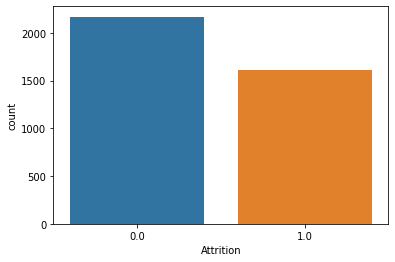

In [12]:
#the number of employees that stayed and left the company
sns.countplot(df['Attrition'])

In [13]:
df.shape      

(3786, 14)

*  We have unique 3786 data points and 14 column,Out of them 2170 data point belonging to Class NO(0) and 1616 data point belonging to class 'Yes(1)'





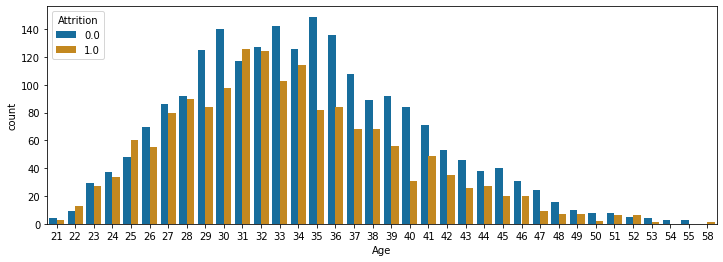

In [14]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age',hue='Attrition',data=df, palette='colorblind')

 * From 33 onwards age group, most of the employees did not leave job and majority in attrition is contributed by age group of 31 & 32

.

**Replacing NaN values to prediction date date so we can calculate number of years employee work**

In [15]:
#filling Na/NaN values
 
df['LastWorkingDate'] = df['LastWorkingDate'].fillna('2018-01-01')  #filling nan values to prediction date date so we can calculate number of years employee work

df.head(5)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,2018-01-01,2,2,0,1,0.0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1.0
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,1.0
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,2018-01-01,3,3,0,2,0.0


**Introducing new feature using first working day and last working day variables**

In [16]:
#Introducing new feature using first working day and last working day variables-

df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])             #handling timeseries data
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

df4 = pd.DataFrame( columns = ['day','year'])                           #creating  2 new features number of days employee work and number of years employee work
df4['day'] = df['LastWorkingDate'] - df['Dateofjoining']
df4['year'] = df4["day"] / timedelta(days=365)
print(df4)

           day      year
2      78 days  0.213699
4      56 days  0.153425
9     141 days  0.386301
12     58 days  0.158904
17    154 days  0.421918
...        ...       ...
19082 885 days  2.424658
19090 419 days  1.147945
19096 335 days  0.917808
19097 207 days  0.567123
19103 207 days  0.567123

[3786 rows x 2 columns]






#  Dropping unwanted column from Dataset -






In [17]:
df=df.drop(labels=['MMM-YY','Dateofjoining','LastWorkingDate','Gender','City','Education_Level'],axis=1)  # dropping the table because they are useless in our prediction

#adding  new features to our data
df['year'] = df4['year']
df.head()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition,year
2,1,28,57387,1,1,0,2,1.0,0.213699
4,2,31,67016,2,2,0,1,0.0,0.153425
9,4,43,65603,2,2,0,1,1.0,0.386301
12,5,29,46368,1,1,0,1,1.0,0.158904
17,6,31,78728,3,3,0,2,0.0,0.421918


In [19]:
df.to_csv('test matching data.csv')    # creating csv before dropping emp_id column so we can merge test csv with train csv for prediction

In [18]:

df.isna().sum()  #checking the na values 

Emp_ID                  0
Age                     0
Salary                  0
Joining Designation     0
Designation             0
Total Business Value    0
Quarterly Rating        0
Attrition               0
year                    0
dtype: int64

**Dropping id table-** 

In [20]:
#dropping id table
df = df.drop (labels='Emp_ID',axis = 1)                 
df['attrition']= df['Attrition']
df= df.drop(labels='Attrition',axis = 1)    #shifting attrition table at last
df.head()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,year,attrition
2,28,57387,1,1,0,2,0.213699,1.0
4,31,67016,2,2,0,1,0.153425,0.0
9,43,65603,2,2,0,1,0.386301,1.0
12,29,46368,1,1,0,1,0.158904,1.0
17,31,78728,3,3,0,2,0.421918,0.0


# Visualizing our Variables-

In [21]:
#get the correlation
df.corr()


,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,year,attrition
Age,1.000000,0.206268,0.037007,0.232007,0.108688,0.176884,0.290977,-0.086887
Salary,0.206268,1.000000,0.426087,0.763119,0.210070,0.161362,0.361604,-0.197989
Joining Designation,0.037007,0.426087,1.000000,0.636419,-0.016649,-0.165726,-0.244750,-0.018186
Designation,0.232007,0.763119,0.636419,1.000000,0.225288,0.079204,0.364991,-0.187618
Total Business Value,0.108688,0.210070,-0.016649,0.225288,1.000000,0.481810,0.284155,-0.279146
Quarterly Rating,0.176884,0.161362,-0.165726,0.079204,0.481810,1.000000,0.393762,-0.488228
year,0.290977,0.361604,-0.244750,0.364991,0.284155,0.393762,1.000000,-0.377031
attrition,-0.086887,-0.197989,-0.018186,-0.187618,-0.279146,-0.488228,-0.377031,1.000000


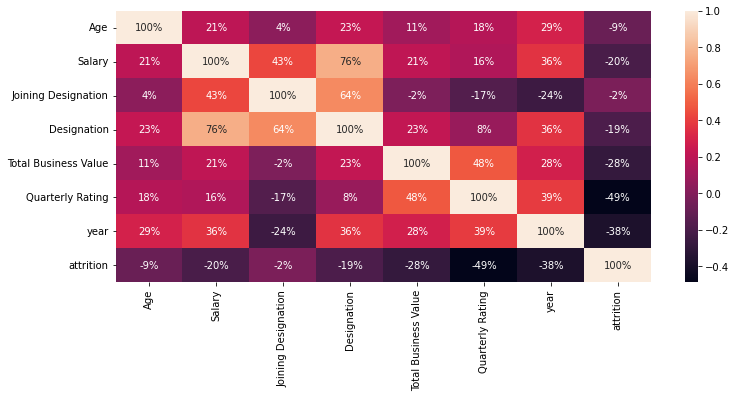

In [22]:
#visualize the correlation
plt.subplots(figsize=(12,5))
sns.heatmap(df.corr(), annot=True,fmt ='.0%')

In [23]:
df.to_csv('processedtrain.csv')    # processed trainnig data csv

In [24]:
df.shape  #checking shape of data

(3786, 8)


# Dividing the Data into Two Parts "TRAINING" and "TESTING" -




In [25]:
#split the data
x = df.iloc[:,0:7].values      # splitting all the rows from column 0 to 6 in x
y = df.iloc[: ,7].values        #splitting attrtion column in y       

print('x{}'.format(x))
print('================================================')
print('y:{}'.format(y))

x[[2.80000000e+01 5.73870000e+04 1.00000000e+00 ... 0.00000000e+00
  2.00000000e+00 2.13698630e-01]
 [3.10000000e+01 6.70160000e+04 2.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.53424658e-01]
 [4.30000000e+01 6.56030000e+04 2.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 3.86301370e-01]
 ...
 [2.80000000e+01 6.94980000e+04 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 9.17808219e-01]
 [2.90000000e+01 7.02540000e+04 2.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 5.67123288e-01]
 [3.00000000e+01 7.02540000e+04 2.00000000e+00 ... 4.11480000e+05
  2.00000000e+00 5.67123288e-01]]
y:[1. 0. 1. ... 1. 0. 0.]


#  Building The model from "TRAINING DATA SET"-

In [26]:
#split the data into 25% testing and 75% training
from sklearn.model_selection import train_test_split               #importing train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,train_size= 0.80  , random_state =0 )  #splitting  data , 80-20=train-test split

In [27]:
#using KNN Classifier as  our model
from sklearn.neighbors import KNeighborsClassifier          #importing knnClassifier 
knn =KNeighborsClassifier(n_neighbors=7,weights='uniform',algorithm='auto')  # n=7
knn.fit(x_train, y_train)     #fitting the model 

y_pred = knn.predict(x_test)   # predicting cross validation test data


# Evaluating KNNclassifier using macro f1_score metrics -

In [28]:
from sklearn.metrics import f1_score   #importing f1_score from sklearn
f1 = f1_score(y_test,y_pred)    #getting the f1_score
print(f1)


0.7378640776699029


# 4. Test data:





*   Creating test file from given 'test_hXY9mYw.csv'




In [30]:
#Creating test file from given 'test_hXY9mYw.csv'
df1=pd.read_csv('/content/test matching data.csv')
df2=pd.read_csv('/content/test_hXY9mYw.csv')

test_data = pd.merge(df2,df1)   #merginf df1 and df2 using EMP_ID column


In [31]:
#dropping duplicate values
test_data = test_data.drop(labels=['Attrition','Unnamed: 0'],axis=1)
test_data=test_data.drop_duplicates(subset= 'Emp_ID',keep='last')
test_data.to_csv('test_data.csv')


In [32]:
test_data.shape

(741, 8)

### Dropping the Emp_ID column from test data

In [33]:
#dropping the Emp_ID column -
test_data= test_data.drop(labels='Emp_ID',axis=1)
test_data.head()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,year
2,34,97722,2,4,2701750,3,6.578082
5,39,56174,1,3,706010,3,6.558904
8,39,96750,2,4,1518520,2,6.520548
10,40,88813,1,4,1151820,2,6.482192
13,32,188418,2,5,3772910,2,6.386301


### **Predicting the given test-data point** :-

In [34]:
Final_result= knn.predict(test_data)    #Predicting the given test-data point where  how many employee will leave the company in given jan-2018 quarter

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [36]:
#Creating submission file of the final result-

df6=pd.read_csv('/content/test_data.csv')
df6=df6.drop(labels='Unnamed: 0', axis=1)
test= pd.DataFrame(columns=['Emp_ID','Target'])
test['Emp_ID']=df6['Emp_ID']
test['Target']=Final_result
test.head(20)

,Emp_ID,Target
0,394,0.0
1,173,0.0
2,1090,0.0
3,840,0.0
4,308,0.0
5,1864,0.0
6,1606,0.0
7,954,0.0
8,2422,0.0
9,1841,0.0


In [37]:
test['Target'].value_counts() #checking predicted values_count

0.0    577
1.0    164
Name: Target, dtype: int64


# Conclusion :- 
*  From above result we can assume that out of 741 employees ,we can expect that 160 employees will leave the company in the upcoming two quarters (01 Jan 2018 - 01 July 2018)  and  581 employees will be remain at their designation.

  






# Suggestion:-
*  As data scientist i would suggest From above Analysis and Prediction that ,company should offer more salary to more experience 

1.   company should offer more salary to more experience person.

2.  Company should give better designation to old employees.





## Submission File :-

In [38]:
test.to_csv('Final_result.csv')   #submission file